In [32]:
# Name: Satyam Jha 
# Roll:  2301070
# Div: A

import numpy as np 
import pandas as pd 

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timezone
import nltk
from collections import Counter

In [34]:
df = pd.read_csv('Products.csv')
df.head()

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,name,primaryCategories,sourceURLs,upc,weight,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,NaN,...,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.93796E+11,32.8 pounds,NaN,NaN,NaN,NaN,NaN
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,In Stock,New,USD,2017-09-08T05:00:00Z,False,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,Yes,New,USD,2017-10-10T05:00:00Z,False,Bestbuy.com,NaN,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,Yes,New,USD,2017-08-28T07:00:00Z,False,Bestbuy.com,NaN,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14 pounds,NaN,NaN,NaN,NaN,NaN


In [35]:
# Removing empty comlumns at the end of dataset
df = df.drop(['Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30'], axis=1)

# Removing columns that are irrelevant/difficult to leverage for our objectives
df = df.drop(['id', 'primaryCategories', 'sourceURLs', 'prices.sourceURLs', 'imageURLs', 'ean', 'asins', 'upc', 'keys',
             'manufacturer', 'manufacturerNumber'], axis=1)

Next up, we will also be renaming some of the remaining columns into something less lengthy.

In [36]:
df = df.rename(columns={'prices.amountMax':'MaxPrice', 'prices.amountMin':'MinPrice', 'prices.availability':'Availability', 
                        'prices.condition':'isNew', 'prices.currency':'Currency', 'prices.dateSeen':'DateSeen', 
                        'prices.isSale':'isSale', 'prices.merchant':'Merchant', 'prices.shipping':'Shipping', 'brand':'Brand',
                        'categories':'Categories', 'dateAdded':'DateAdded', 'dateUpdated':'DateUpdated', 'name':'Name', 
                        'weight':'Weight'})

At this point, you may have noticed that certain fields such as Availability contain multiple forms of string values instead of numerical values. 

In [37]:
df['Availability'].unique()

array(['Yes', 'In Stock', 'TRUE', 'undefined', 'yes', 'Out Of Stock',
       'Special Order', 'No', 'More on the Way', 'sold', 'FALSE',
       'Retired', '32 available', '7 available', nan, 'Limited Stock',
       'Discontinued', 'More Coming Soon'], dtype=object)

In [38]:
df['Availability'] = df['Availability'].map({'Yes':1, 'In Stock':1, 'TRUE':1, 'undefined':0, 'yes':1, 'Out Of Stock':0, 
                                             'Special Order':1, 'No':0, 'More on the Way':0, 'sold':0, 'FALSE':0, 'Retired':0, 
                                             '32 available':1, '7 available':1})

In [39]:
df['isNew'] = df['isNew'].map({'New':1, 'new':1, 'Seller refurbished':0, 'Used':0, 'pre-owned':0, 'Refurbished':0, 
                               'Manufacturer refurbished':0, 'New other (see details)':1, 'refurbished':0, 
                               'New Kicker BT2 41IK5BT2V2 Wireless Bluetooth USB Audio System Black + Remote, Power Supply (volts, ampere): 24, 2.9, Square Reflex Subwoofer (in., mm): 6 x 6", Stereo Amp Power with DSP (watts): 50, App for customizing - KickStart, Remote Control Included, Height x Width x Depth (in, mm): 8.87" x 19" x 9.14", Frequency Response (Hz): 24-20k, +-3dB, Woofer (in., cm): 5", 1 Year Manufacturer Warranty, Item Weight: 13.85 lbs., USB Port, Compatible with: Bluetooth-enabled devices, Aux-in, Speaker Design: 2-Way Full-Range, Bluetooth wireless streaming, Condition: Brand New!, Tweeter (in., cm): 3/4"':1,
                               '5/16" Ring Terminal, 3 ft. 8 GA Black Ground Cable, 6 ft. Split Loom Tubing, Depth: 6.5" (165mm) (top) 11.2" (285mm) (bottom), Item Weight: 18.5 lbs., Frequency Response 25Hz - 500Hz, Line Output, Max Power: 1100 Watt x 1 Channel @ 2 Ohm, 30 ft. Speaker Wire, Boss Illuminated Logo, Height: 12.8" (325mm), (3) Rubber Grommets, Item Weight: 2 lbs., Size 10", 20 ft. 8 GA Red Power Cable, Ported enclosure for greater output and deeper bass, 2 Ohm Stable, Class A/B, Voice Coil Size 2", Black rubber surround, Nominal Impedance 4 ohm, Rugged fiberboard construction with thick carpet covering, Warranty: 1 Year Manufacturer Warranty, MOSFET Power, Weight: 6 lbs, Width: 17.7" (450mm), Condition: Brand New!, Low Pass Crossover, List item, RMS Power: 250 Watt x 1 Channel @ 4 Ohm, Remote Bass Control Included!, 1/4" Ring Terminal, 16 ft. 18 GA Blue Turn-On Wire, Peak Power: 500 Watts, Competition High Quality Fuse Holder, Condition: BRAND NEW!, Product Condition: Brand New, RMS Power: 175 Watts, Aluminum woofer cone, THD: 0.01%, 1 Year Manufacturer Warranty, Dimensions: 10-7/16" (W) x 2-1/4" (H) x 9-1/8" (L), #10 Ring Terminal, 20 ft. High Performance Black RCA, SPL (db @ 1w/1m) 88dB, New Dual SBX101 10" 500 Watts Car Audio Subwoofer Sub + Ported Sub Enclosure, (20) 4" Wire Ties':1})

In [40]:
df['isSale'] = df['isSale'].map({False:0, True:1})

In [41]:
df['Shipping'] = df['Shipping'].fillna(0)

In [42]:
df['Shipping'] = df['Shipping'].map({'Expedited':1, 'Value':1, 'Standard':1, 'Free Shipping':0, 
                                     'Free Shippingon orders 35 and up':0, 'Free Expedited Shipping':0, 
                                     'Free Shipping on orders 35 and up':0, 'Free Expedited Shipping for most orders over $49':0, 
                                     'FREE':0, 'Freight':1, 'Free Shipping for this Item':0, 
                                     'Free Standard Shipping on Orders Over $49':0, 'Free Delivery':0, 
                                     'Shipping Charges Apply':1, 'Free Standard Shipping':0, 
                                     'Free Next Day Delivery (USA)':0}).fillna(1)

In [43]:
i = df[df['Weight']=='Electronics'].index
df = df.drop(i, axis=0)

In [44]:
i = df[df['Weight']=='http://www.walmart.com/ip/Kenwood-DDX9703S-6-95-Double-DIN-In-Dash-DVD-Receiver-with-Bluetooth-Apple-CarPlay-Android-Auto-HD-Radio-and-SiriusXM-Ready/54695274,https://www.amazon.com/Kenwood-DDX9703S-Stereo-Carplay-Android/dp/B01GITWG5S/,https://www.ebay.com/urw/product-reviews/6003304884?_itm=282520765993,https://www.ebay.com/urw/product-reviews/6003304884?_itm=272989525770,https://www.walmart.com/ip/Kenwood-DDX9703S-6-95-Double-DIN-In-Dash-DVD-Receiver-with-Bluetooth-Apple-CarPlay-Android-Auto-HD-Radio-and-SiriusXM-Ready/54695274,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded,https://www.bestbuy.com/site/kenwood-6-95-android-auto-apple-carplay-built-in-bluetooth-in-dash-cd-dvd-dm-receiver-black/4969400.p?skuId=4969400,http://www.ebay.com/itm/Kenwood-6-95-Android-Auto-Apple-CarPlay-Built-in-Bluetooth-In-Dash-/322229392622?hash=item4b065e54ee,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=28,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=27,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=24,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=26,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=20,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=25,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=22,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=21,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=23,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=16,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=19,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=18,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=17,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=15,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=13,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=14,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=12,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=11,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=7,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=5,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=8,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=10,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=2,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=9,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=6,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=3,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=4,http://www.ebay.com/itm/Kenwood-DDX9703S-2-DIN-DVD-CD-Player-6-95-LCD-Android-iPhone-HD-Radio-Bluetooth/182198714536,http://www.bestbuy.com/site/kenwood-6-95-android-auto-apple-carplay-built-in-bluetooth-in-dash-cd-dvd-dm-receiver-black/4969400.p?skuId=4969400,http://www.ebay.com/itm/Kenwood-DDX9703S-Double-2-DIN-DVD-CD-Player-Android-iPhone-HD-Radio-Bluetooth-/201635793843,http://www.ebay.com/itm/KENWOOD-DDX9703S-2-DIN-6-95-TV-DVD-CD-Player-Android-iPhone-HD-Radio-Bluetooth-/292166538126,http://www.ebay.com/itm/Kenwood-DDX9703S-CarPlay-Android-Stereo-2DIN-In-Dash-DVD-CD-AMFM-6-95-Touch-NEW-/132239386357,http://www.ebay.com/itm/Kenwood-DDX9703S-Double-2-DIN-DVD-CD-Player-Android-iPhone-HD-Radio-Bluetooth-/352086023468,http://www.ebay.com/itm/Kenwood-DDX9703S-Double-2-DIN-DVD-CD-Player-Android-iPhone-HD-Radio-Bluetooth-/201635793843?hash=item2ef26e0bb3:g:x7sAAOSwwo1Xfwa0&vxp=mtr,http://www.ebay.com/itm/Kenwood-DDX9703S-Double-2-DIN-DVD-CD-Player-Android-iPhone-HD-Radio-Bluetooth-/352086023468?hash=item51f9f65d2c:g:BJAAAOSw1~JZPvFJ,http://www.ebay.com/itm/Kenwood-DDX9703S-Double-2-DIN-DVD-CD-Player-Android-iPhone-HD-Radio-Bluetooth-/162546830375?hash=item25d88bcc27:g:~UIAAOSw8GtZOdR6,http://www.frys.com/product/8773411,http://frys.com/product/8773411,https://www.amazon.ca/Kenwood-DDX9703S-DVD-receiver/dp/B01GITWG5S,https://www.walmart.com/ip/Kenwood-DDX9703S-6.95-Double-DIN-In-Dash-DVD-Receiver-with-Bluetooth-Apple-CarPlay-Android-Auto-HD-Radio-and-SiriusXM-Ready/54695274'].index
df = df.drop(i, axis=0)

In [45]:
def dateCleaner(date):
    date = str(date).split(',')[0]
    cleaned_date = datetime.fromisoformat(date[:-1]).astimezone(timezone.utc)
    return cleaned_date

In [46]:
df['DateSeen'] = df['DateSeen'].map(dateCleaner)
df['DateAdded'] = df['DateAdded'].map(dateCleaner)
df['DateUpdated'] = df['DateUpdated'].map(dateCleaner)

In [47]:
def poundsToNum(pounds):
    if type(pounds)==str:   
        pounds = pounds.split()
        num = float(pounds[0])
        unit = pounds[-1]
        if unit in ['oz', 'ounces']:
            num = num/16
        pounds = num
    return pounds

In [48]:
df['Weight'] = df['Weight'].map(poundsToNum)

Finally, with all that done we should be able to proceed into our EDA phase. Before that lets take a final look at our cleaned dataset for reference.

In [49]:
df.head()

,MaxPrice,MinPrice,Availability,isNew,Currency,DateSeen,isSale,Merchant,Shipping,Brand,Categories,DateAdded,DateUpdated,Name,Weight
0,104.99,104.99,1.0,1.0,USD,2017-03-30 00:30:00+00:00,0,Bestbuy.com,1.0,Sanus,"Audio & Video Accessories,TV Mounts,TV Accesso...",2015-04-13 06:30:51+00:00,2018-05-12 13:29:48+00:00,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,32.8
1,69.00,64.99,1.0,1.0,USD,2017-12-14 00:30:00+00:00,1,Walmart.com,1.0,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18 08:44:56+00:00,2018-06-13 14:09:02+00:00,Boytone - 2500W 2.1-Ch. Home Theater System - ...,14.0
2,69.00,69.00,1.0,1.0,USD,2017-09-07 23:30:00+00:00,0,Walmart.com,1.0,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18 08:44:56+00:00,2018-06-13 14:09:02+00:00,Boytone - 2500W 2.1-Ch. Home Theater System - ...,14.0
3,69.99,69.99,1.0,1.0,USD,2017-10-09 23:30:00+00:00,0,Bestbuy.com,1.0,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18 08:44:56+00:00,2018-06-13 14:09:02+00:00,Boytone - 2500W 2.1-Ch. Home Theater System - ...,14.0
4,66.99,66.99,1.0,1.0,USD,2017-08-28 01:30:00+00:00,0,Bestbuy.com,1.0,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18 08:44:56+00:00,2018-06-13 14:09:02+00:00,Boytone - 2500W 2.1-Ch. Home Theater System - ...,14.0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14559 entries, 0 to 14591
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   MaxPrice      14559 non-null  float64            
 1   MinPrice      14559 non-null  float64            
 2   Availability  12620 non-null  float64            
 3   isNew         13145 non-null  float64            
 4   Currency      14559 non-null  object             
 5   DateSeen      14559 non-null  datetime64[ns, UTC]
 6   isSale        14559 non-null  int64              
 7   Merchant      13787 non-null  object             
 8   Shipping      14559 non-null  float64            
 9   Brand         14559 non-null  object             
 10  Categories    14559 non-null  object             
 11  DateAdded     14559 non-null  datetime64[ns, UTC]
 12  DateUpdated   14559 non-null  datetime64[ns, UTC]
 13  Name          14559 non-null  object             
 14  Weight

<AxesSubplot:>

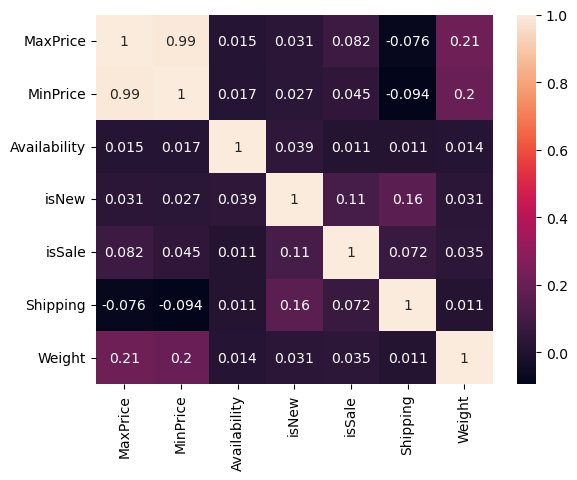

In [51]:
# heatmap for numeric data only
sub_df = df.drop(['Currency', 'DateSeen', 'Merchant', 'Brand', 'Categories', 'DateAdded', 'DateUpdated', 'Name'], axis=1)
corr = sub_df.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:xlabel='MaxPrice', ylabel='Density'>

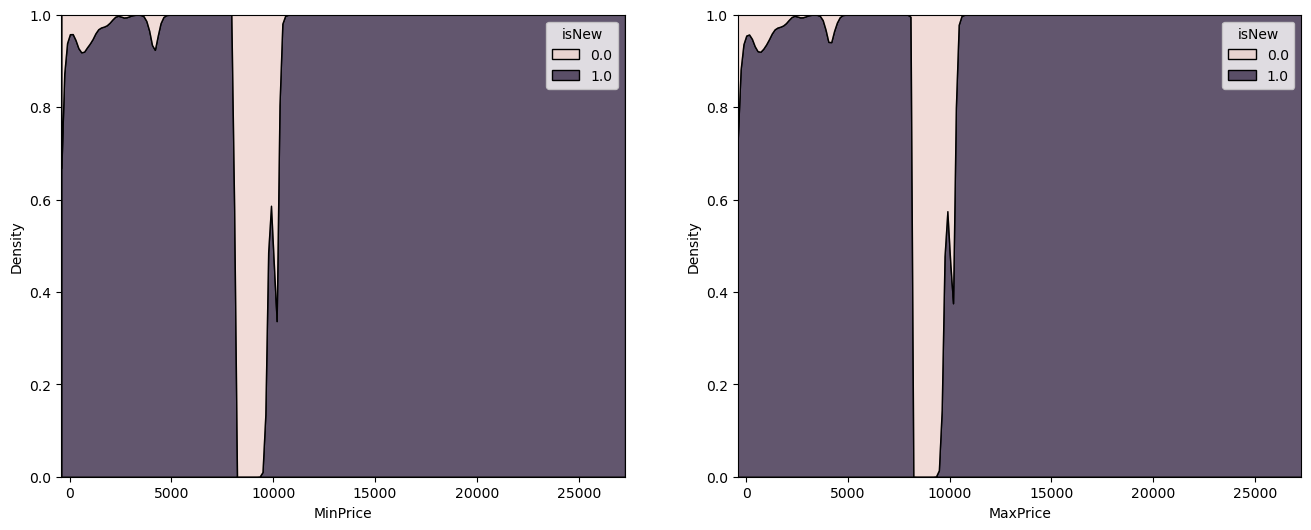

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
data = df[['MinPrice', 'MaxPrice', 'isNew']]
sns.kdeplot(data=data, x='MinPrice', hue='isNew', multiple='fill', ax=ax[0])
sns.kdeplot(data=data, x='MaxPrice', hue='isNew', multiple='fill', ax=ax[1])

In [53]:
df[(df['MinPrice']>3900) & (df['MinPrice']<4100)] # 1428 is the outlier behind that sudden jump

,MaxPrice,MinPrice,Availability,isNew,Currency,DateSeen,isSale,Merchant,Shipping,Brand,Categories,DateAdded,DateUpdated,Name,Weight
1421,3959.99,3959.99,1.0,1.0,USD,2017-07-08 22:30:00+00:00,1,Bestbuy.com,1.0,Razer,"Computers/Tablets & Networking,Computers & Acc...",2017-05-22 02:06:58+00:00,2018-06-13 14:09:16+00:00,Razer - Blade Pro 17.3 4K Ultra HD Touch-Scree...,7.69
1428,3989.99,3989.99,1.0,0.0,USD,2017-08-28 08:30:00+00:00,1,compucell.tech,0.0,Razer,"Computers/Tablets & Networking,Computers & Acc...",2017-05-22 02:06:58+00:00,2018-06-13 14:09:16+00:00,Razer - Blade Pro 17.3 4K Ultra HD Touch-Scree...,7.69
2290,4999.99,4096.00,0.0,1.0,USD,2017-11-08 14:30:00+00:00,1,Beach Camera,1.0,Sony,"TVs & Electronics,4K Ultra HD TVs,TV, Video & ...",2017-04-04 04:07:00+00:00,2018-06-13 14:20:10+00:00,Sony - 55 Class - OLED - A1E Series - 2160p - ...,63.50
2297,3999.99,3999.99,1.0,1.0,USD,2017-05-31 13:30:00+00:00,0,Bestbuy.com,0.0,Sony,"TVs & Electronics,4K Ultra HD TVs,TV, Video & ...",2017-04-04 04:07:00+00:00,2018-06-13 14:20:10+00:00,Sony - 55 Class - OLED - A1E Series - 2160p - ...,63.50
8765,3996.00,3996.00,1.0,1.0,USD,2018-01-25 15:30:00+00:00,0,bhphotovideo.com,0.0,Sony,"Digital Cameras,Camera Accessories,Mirrorless ...",2015-11-06 08:26:29+00:00,2018-06-21 16:10:45+00:00,Alpha a7S II Mirrorless Digital Camera Body wi...,1.29
8774,3925.00,3925.00,1.0,1.0,USD,2017-12-06 10:30:00+00:00,0,bhphotovideo.com,0.0,Sony,"Digital Cameras,Camera Accessories,Mirrorless ...",2015-11-06 08:26:29+00:00,2018-06-21 16:10:45+00:00,Alpha a7S II Mirrorless Digital Camera Body wi...,1.29
8777,4010.50,4010.50,1.0,1.0,USD,2018-01-25 14:30:00+00:00,0,bhphotovideo.com,0.0,Sony,"Digital Cameras,Camera Accessories,Mirrorless ...",2015-11-06 08:26:29+00:00,2018-06-21 16:10:45+00:00,Alpha a7S II Mirrorless Digital Camera Body wi...,1.29
8783,3906.00,3906.00,1.0,1.0,USD,2017-12-06 10:30:00+00:00,0,bhphotovideo.com,0.0,Sony,"Digital Cameras,Camera Accessories,Mirrorless ...",2015-11-06 08:26:29+00:00,2018-06-21 16:10:45+00:00,Alpha a7S II Mirrorless Digital Camera Body wi...,1.29
8786,4012.00,4012.00,1.0,1.0,USD,2018-01-25 15:30:00+00:00,0,bhphotovideo.com,0.0,Sony,"Digital Cameras,Camera Accessories,Mirrorless ...",2015-11-06 08:26:29+00:00,2018-06-21 16:10:45+00:00,Alpha a7S II Mirrorless Digital Camera Body wi...,1.29
8789,3912.00,3912.00,1.0,1.0,USD,2018-01-25 15:30:00+00:00,1,bhphotovideo.com,0.0,Sony,"Digital Cameras,Camera Accessories,Mirrorless ...",2015-11-06 08:26:29+00:00,2018-06-21 16:10:45+00:00,Alpha a7S II Mirrorless Digital Camera Body wi...,1.29


In [54]:
def calcDiff(date):
    diff = date - base
    return diff.days

In [55]:
data = df.sort_values(by='DateSeen', ascending=False)
data = data[['DateSeen', 'Merchant', 'MinPrice']]
base = list(data.sort_values('DateSeen')['DateSeen'])[0]
data['DateSeen'] = data['DateSeen'].map(calcDiff)

In [56]:
corr_df = data[['DateSeen', 'MinPrice']]
corr_df.corr()

,DateSeen,MinPrice
DateSeen,1.000000,0.034305
MinPrice,0.034305,1.000000


As can be seen in the correlations above, it appears that date seen has an extremely small impact on the minimum price of products. Regardless, we can take a further look into things by considering how these prices change over time.

Merchant
Amazon.com          AxesSubplot(0.125,0.2;0.775x0.68)
Beach Camera        AxesSubplot(0.125,0.2;0.775x0.68)
Bestbuy.com         AxesSubplot(0.125,0.2;0.775x0.68)
Walmart.com         AxesSubplot(0.125,0.2;0.775x0.68)
bhphotovideo.com    AxesSubplot(0.125,0.2;0.775x0.68)
Name: MinPrice, dtype: object

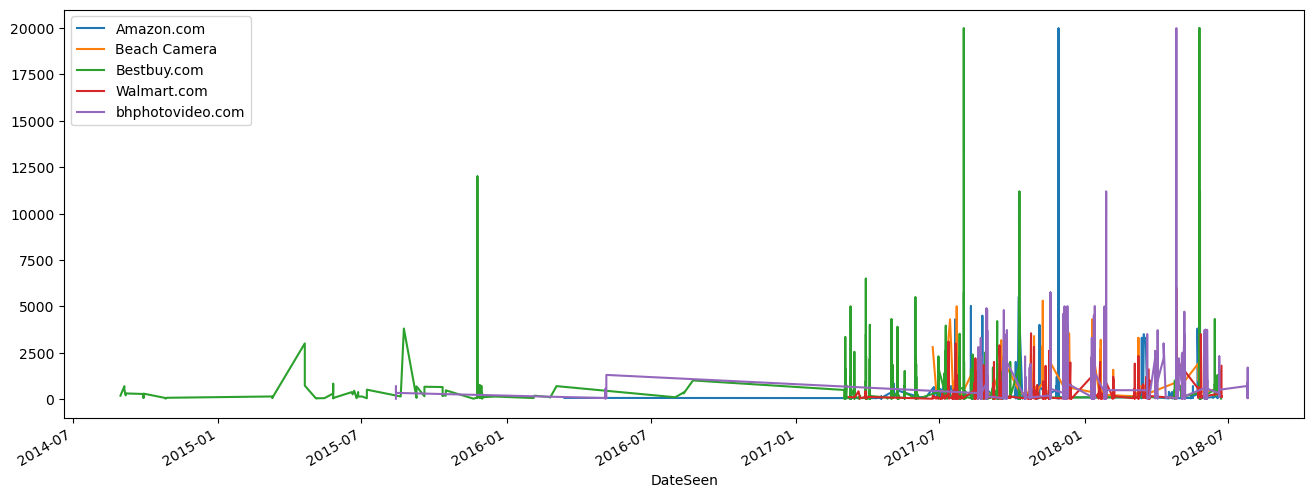

In [57]:
fig, ax = plt.subplots(figsize=(16,6))
data = df.sort_values(by='DateSeen', ascending=False)
data = data[['DateSeen', 'Merchant', 'MinPrice']].set_index('DateSeen')
top5 = data.groupby('Merchant').sum().sort_values('MinPrice', ascending=False).head(5)
data[data['Merchant'].isin(list(top5.index))].groupby('Merchant')['MinPrice'].plot(legend=True)

Merchant
Amazon.com          AxesSubplot(0.125,0.2;0.775x0.68)
Beach Camera        AxesSubplot(0.125,0.2;0.775x0.68)
Bestbuy.com         AxesSubplot(0.125,0.2;0.775x0.68)
Walmart.com         AxesSubplot(0.125,0.2;0.775x0.68)
bhphotovideo.com    AxesSubplot(0.125,0.2;0.775x0.68)
Name: MinPrice, dtype: object

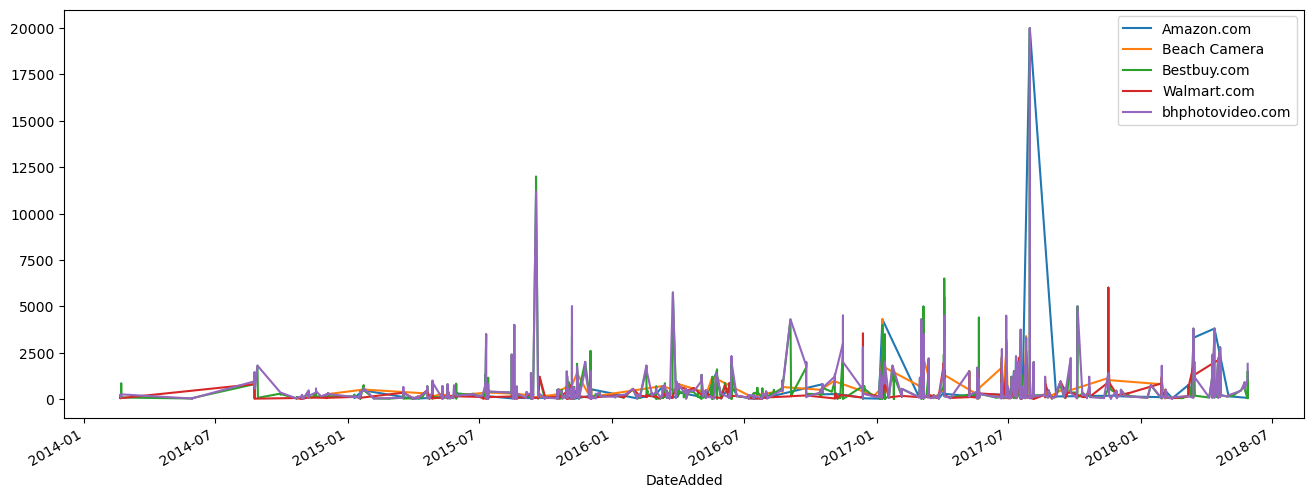

In [58]:
fig, ax = plt.subplots(figsize=(16,6))
data = df.sort_values(by='DateAdded', ascending=False)
data = data[['DateAdded', 'Merchant', 'MinPrice']].set_index('DateAdded')
top5 = data.groupby('Merchant').sum().sort_values('MinPrice', ascending=False).head(5)
data[data['Merchant'].isin(list(top5.index))].groupby('Merchant')['MinPrice'].plot(legend=True)

Merchant
Amazon.com          AxesSubplot(0.125,0.2;0.775x0.68)
Beach Camera        AxesSubplot(0.125,0.2;0.775x0.68)
Bestbuy.com         AxesSubplot(0.125,0.2;0.775x0.68)
Walmart.com         AxesSubplot(0.125,0.2;0.775x0.68)
bhphotovideo.com    AxesSubplot(0.125,0.2;0.775x0.68)
Name: MinPrice, dtype: object

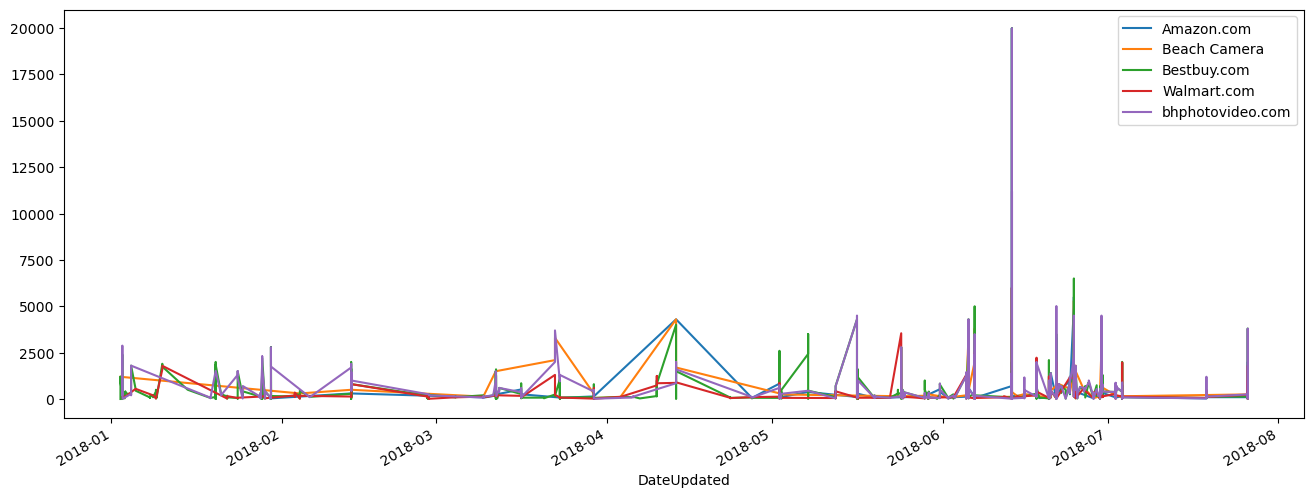

In [59]:
fig, ax = plt.subplots(figsize=(16,6))
data = df.sort_values(by='DateUpdated', ascending=False)
data = data[['DateUpdated', 'Merchant', 'MinPrice']].set_index('DateUpdated')
top5 = data.groupby('Merchant').sum().sort_values('MinPrice', ascending=False).head(5)
data[data['Merchant'].isin(list(top5.index))].groupby('Merchant')['MinPrice'].plot(legend=True)

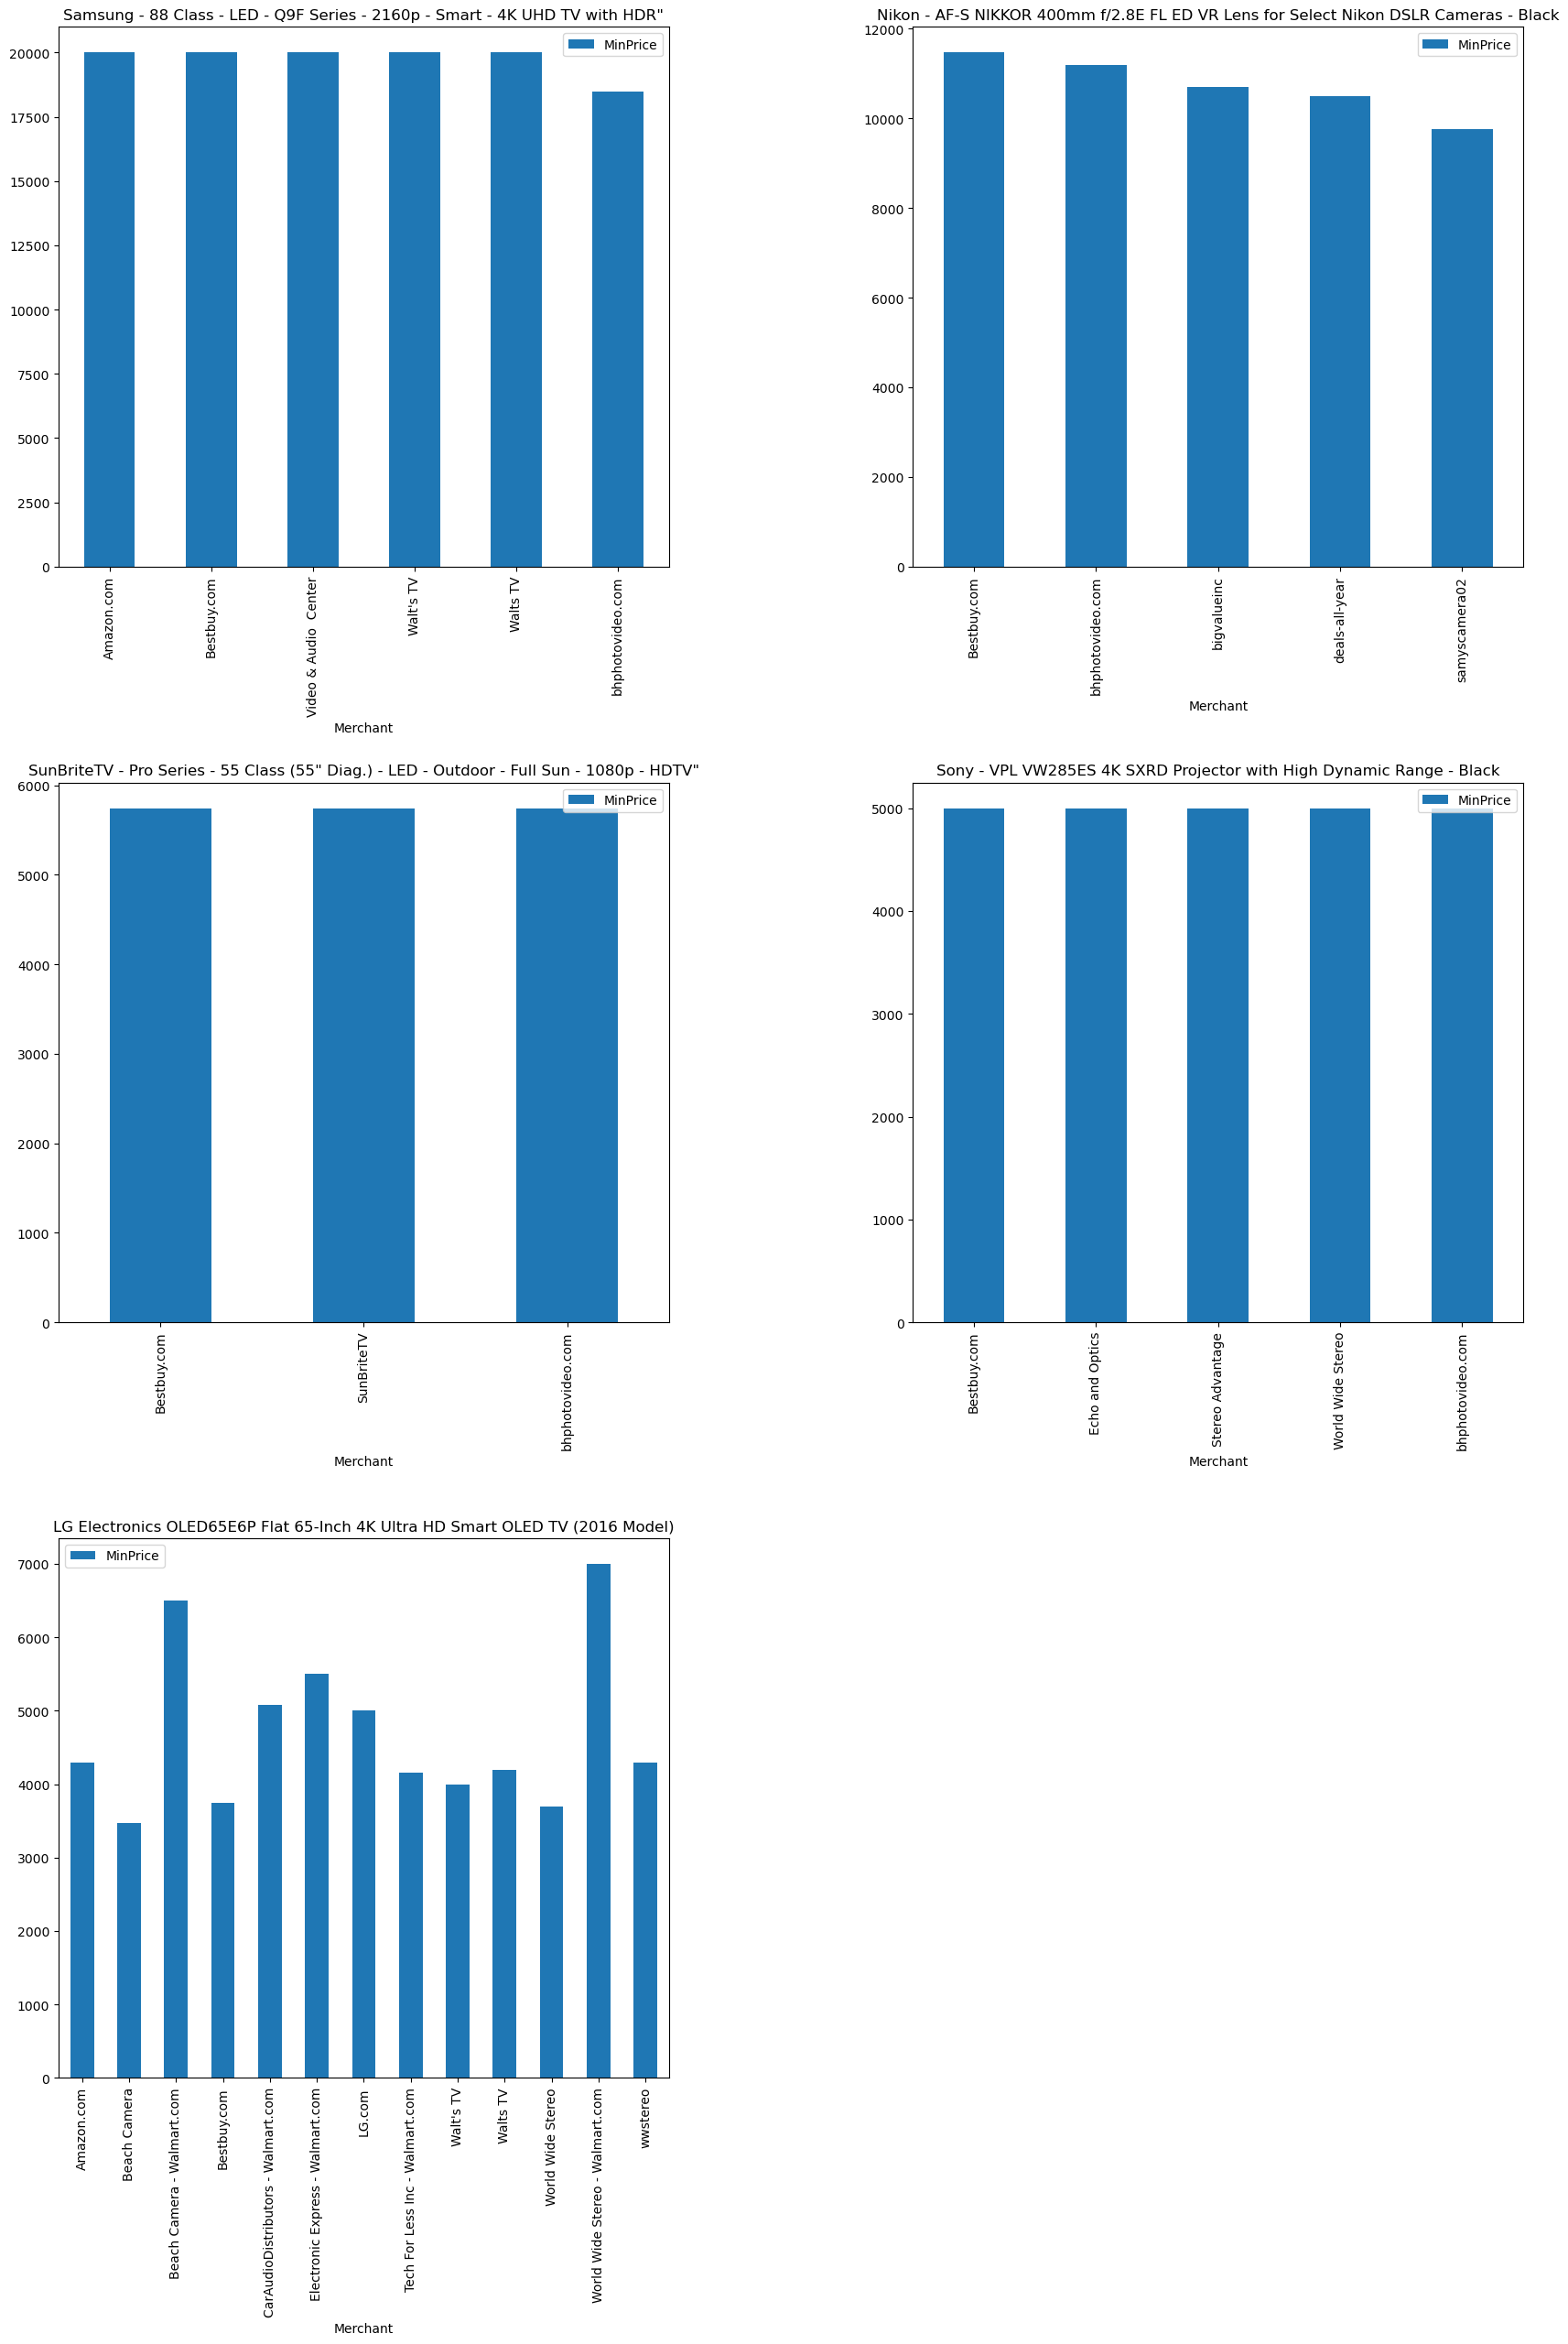

In [60]:
fig, ax = plt.subplots(3,2, figsize=(20,28))
data = df[['Name', 'MinPrice', 'Merchant']]
top5 = data.groupby('Name').mean().sort_values('MinPrice', ascending=False).head(5).index
plot_df1 = data[data['Name']==top5[0]].groupby('Merchant').mean()
plot_df2 = data[data['Name']==top5[1]].groupby('Merchant').mean()
plot_df3 = data[data['Name']==top5[2]].groupby('Merchant').mean()
plot_df4 = data[data['Name']==top5[3]].groupby('Merchant').mean()
plot_df5 = data[data['Name']==top5[4]].groupby('Merchant').mean()

plot_df1.plot.bar(y='MinPrice', use_index=True, title=top5[0], ax=ax[0,0])
plot_df2.plot.bar(y='MinPrice', use_index=True, title=top5[1], ax=ax[0,1])
plot_df3.plot.bar(y='MinPrice', use_index=True, title=top5[2], ax=ax[1,0])
plot_df4.plot.bar(y='MinPrice', use_index=True, title=top5[3], ax=ax[1,1])
plot_df5.plot.bar(y='MinPrice', use_index=True, title=top5[4], ax=ax[2,0])
fig.delaxes(ax[2,1])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

In [61]:
data = df[['Categories', 'MinPrice']]
data.groupby('Categories').mean().sort_values('MinPrice', ascending=False)

,MinPrice
Categories,
"LED & LCD TVs,TVs,4K Ultra HD TVs,Electronics,Television & Video,Televisions,TVs Entertainment,TV & Home Theater,All Flat-Panel TVs",19665.318889
"Photography,Prime Lenses,Lenses & Filters,Cameras & Photo,Digital Camera Accessories,SLR Lenses,Electronics,DSLR Lenses,Camera Lenses,Lenses,Cameras & Camcorders",11247.850833
"Commercial Monitors Displays,Outdoor TVs,Audio Visual Presentation,Electronics,Televisions,TV & Home Theater,LED & LCD TVs,TVs,Monitors Projectors,Commercial Monitors,Large-Format Displays,Television & Video,Commercial Monitors tsvxfexudyvtufffubywasdsrqrfysuezwde",5641.594000
"Office,All TVs,Projectors,TV & Video,Projectors & Presentation Equipment,Audio Visual Presentation,Home Theater Projectors,Electronics,TV & Home Theater,Projectors & Screens,Video Projectors,Office Technology",4998.160000
"4K Ultra HD TVs,Electronics Features,TV, Video & Home Audio,Frys,Electronics,Shop TVs by Type,Televisions,TV & Home Theater,OLED TVs,All TVs,Consumer Electronics,TVs,TV & Video,Television & Video,LG E6,4K Ultra HDTVs",4815.541935
...,...
"Tools,Automotive,Batteries, Chargers & Jumper Cables,Car Battery Chargers,Home & Garden,Household Supplies & Cleaning,Other Home Cleaning Supplies,electronics,Cell Phones,Cell Phone Accessories,Cell Phone Batteries & Power,Portable Chargers/Power Packs",14.923333
"Computers,Computer Accessories,Computer Accessories & Peripherals,Home Safety,Door Hardware,All Home Security,Tablet Computer Cases,Case Luggage Locks,Home Improvement,Laptop Accessories,Computers & Tablets,Security Locks,Computer Security Locks,Hardware,Desktop Other Bags,Office Equipment Supplies,all electronics,Door Security",14.027000
"Smart Home,Smart Electronics,Bluetooth Speakers,Electronics,Home Audio & Theater,Home Audio,All Home Speakers,Speaker Systems,Audio,Bluetooth & Wireless Speakers,Stereos",13.953333


In [64]:
def summarizer(categories):
    categories = categories.replace(',', ' ')
    tokens = nltk.word_tokenize(categories)
    tagged = nltk.pos_tag(tokens)
    
    count_list = []
    for i in range(len(tagged)):
        if tagged[i][1] == 'NNP':
            count_list.append(tagged[i])
            
    counts = Counter(word for word,tag in count_list)
    return max(counts, key=counts.get)

In [65]:
data['Categories'] = data['Categories'].map(summarizer)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\DELL/nltk_data'
    - 'C:\\Users\\DELL\\anaconda3\\nltk_data'
    - 'C:\\Users\\DELL\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\DELL\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\DELL\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [66]:
plot_data = data.groupby('Categories').sum().sort_values('MinPrice', ascending=False).head(10)

<AxesSubplot:xlabel='Categories'>

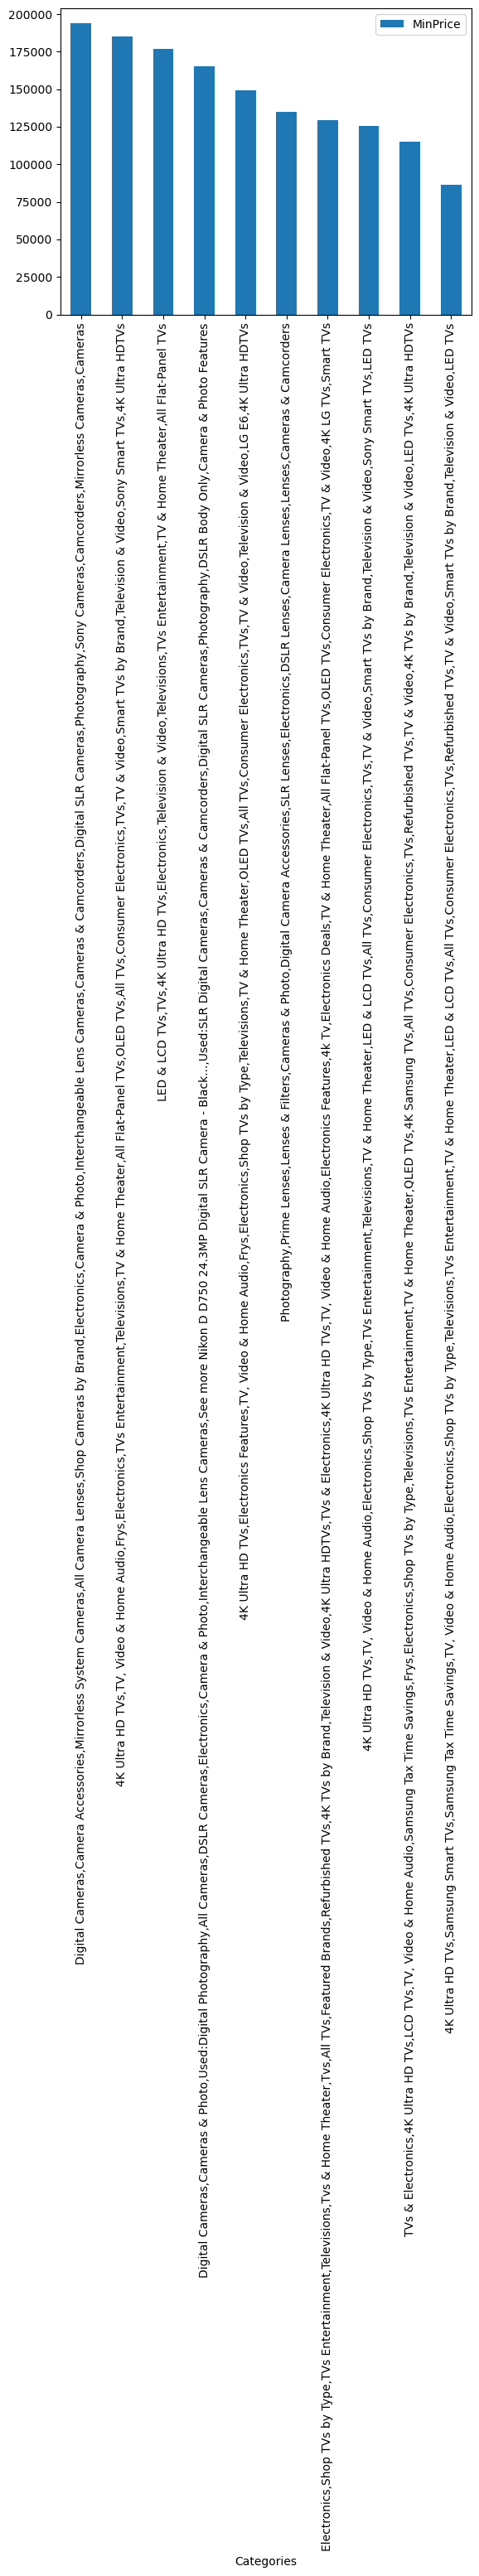

In [67]:
plot_data.plot.bar(y='MinPrice', use_index=True)